# Perform EDA on Johns Hopkins Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NewYork_pop = 8_336_817
LosAngeles_pop = 10_039_107
Chicago_pop = 5_150_233
Houston_pop = 4_092_459
Phoenix_pop = 4_485_414

In [3]:
cases = pd.read_csv('./Covid_data/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('./Covid_data/time_series_covid19_deaths_US.csv')


In [4]:
cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,337,349,351,354,356,356,356,368,375,389
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,40,40,40,42,42,42,44,45,46,46
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,...,77,77,77,77,78,82,85,85,86,89
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,...,91,92,95,96,97,99,101,104,108,109


### Isolate the counties of the 5 biggest cities in the US

In [5]:
NewYork_cases = cases[cases['Admin2']=='New York']
NewYork_deaths = deaths[deaths['Admin2']=='New York']

LosAngeles_cases = cases[cases['Admin2']=='Los Angeles']
LosAngeles_deaths = deaths[deaths['Admin2']=='Los Angeles']

Chicago_cases = cases[(cases['Admin2']=='Cook') & (cases['Province_State']=='Illinois')]
Chicago_deaths = deaths[(deaths['Admin2']=='Cook') & (deaths['Province_State']=='Illinois')]

Houston_cases = cases[(cases['Admin2']=='Harris') & (cases['Province_State']=='Texas')]
Houston_deaths = deaths[(deaths['Admin2']=='Harris') & (deaths['Province_State']=='Texas')]

Phoenix_cases = cases[cases['Admin2']=='Maricopa']
Phoenix_deaths = deaths[deaths['Admin2']=='Maricopa']

In [6]:
NewYork = NewYork_cases.append(NewYork_deaths, sort=False)
NewYork.reset_index(inplace=True)
LosAngeles = LosAngeles_cases.append(LosAngeles_deaths, sort=False)
LosAngeles.reset_index(inplace=True)
Chicago = Chicago_cases.append(Chicago_deaths, sort=False)
Chicago.reset_index(inplace=True)
Houston = Houston_cases.append(Houston_deaths, sort=False)
Houston.reset_index(inplace=True)
Phoenix = Phoenix_cases.append(Phoenix_deaths, sort=False)
Phoenix.reset_index(inplace=True)

In [7]:
NewYork

,index,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,...,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,Population
0,1940,84036061,US,USA,840,36061.0,New York,New York,US,40.767273,...,224051,224249,224551,224863,225148,225460,225723,225964,226280,NaN
1,1940,84036061,US,USA,840,36061.0,New York,New York,US,40.767273,...,23500,23507,23512,23525,23531,23536,23541,23550,23556,8336817.0


### Slice and transpose matrix

In [8]:
NewYork = NewYork.iloc[:,12:-1].transpose()
NewYork.rename({0: 'cases', 1: 'deaths'}, axis='columns', inplace=True)

LosAngeles = LosAngeles.iloc[:,12:-1].transpose()
LosAngeles.rename({0: 'cases', 1: 'deaths'}, axis='columns', inplace=True)

Chicago = Chicago.iloc[:,12:-1].transpose()
Chicago.rename({0: 'cases', 1: 'deaths'}, axis='columns', inplace=True)

Houston = Houston.iloc[:,12:-1].transpose()
Houston.rename({0: 'cases', 1: 'deaths'}, axis='columns', inplace=True)

Phoenix = Phoenix.iloc[:,12:-1].transpose()
Phoenix.rename({0: 'cases', 1: 'deaths'}, axis='columns', inplace=True)


### Create per capita data

In [9]:
NewYork['cases_per'] = NewYork['cases'] / NewYork_pop * 10_000
LosAngeles['cases_per'] = LosAngeles['cases'] / LosAngeles_pop * 10_000
Chicago['cases_per'] = Chicago['cases'] / Chicago_pop * 10_000
Houston['cases_per'] = Houston['cases'] / Houston_pop * 10_000
Phoenix['cases_per'] = Phoenix['cases'] / Phoenix_pop * 10_000

NewYork['deaths_per'] = NewYork['deaths'] / NewYork_pop * 10_000
LosAngeles['deaths_per'] = LosAngeles['deaths'] / LosAngeles_pop * 10_000
Chicago['deaths_per'] = Chicago['deaths'] / Chicago_pop * 10_000
Houston['deaths_per'] = Houston['deaths'] / Houston_pop * 10_000
Phoenix['deaths_per'] = Phoenix['deaths'] / Phoenix_pop * 10_000

### Create 1st order difference data

In [10]:
NewYork['cases_delta'] = NewYork['cases'] - NewYork['cases'].shift(+1)
LosAngeles['cases_delta'] = LosAngeles['cases'] - LosAngeles['cases'].shift(+1)
Chicago['cases_delta'] = Chicago['cases'] - Chicago['cases'].shift(+1)
Houston['cases_delta'] = Houston['cases'] - Houston['cases'].shift(+1)
Phoenix['cases_delta'] = Phoenix['cases'] - Phoenix['cases'].shift(+1)

NewYork['deaths_delta'] = NewYork['deaths'] - NewYork['deaths'].shift(+1)
LosAngeles['deaths_delta'] = LosAngeles['deaths'] - LosAngeles['deaths'].shift(+1)
Chicago['deaths_delta'] = Chicago['deaths'] - Chicago['deaths'].shift(+1)
Houston['deaths_delta'] = Houston['deaths'] - Houston['deaths'].shift(+1)
Phoenix['deaths_delta'] = Phoenix['deaths'] - Phoenix['deaths'].shift(+1)

NewYork.fillna(0, inplace = True)
LosAngeles.fillna(0, inplace = True)
Chicago.fillna(0, inplace = True)
Houston.fillna(0, inplace = True)
Phoenix.fillna(0, inplace = True)

# Plot visualizations of data by city

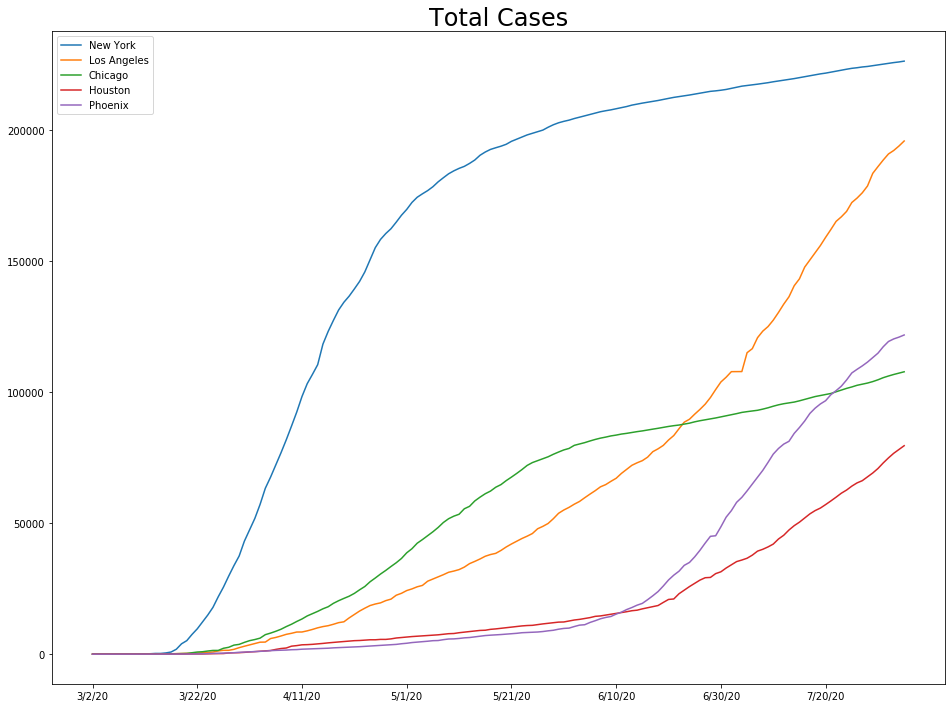

In [11]:
fig = plt.figure(figsize=(16,12))

for city in [NewYork, LosAngeles, Chicago, Houston, Phoenix]:
    plt.plot(city.iloc[40:,0])
    
plt.legend(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])
plt.xticks(NewYork.index[40::20])
plt.title('Total Cases', fontsize = 24)
plt.show()

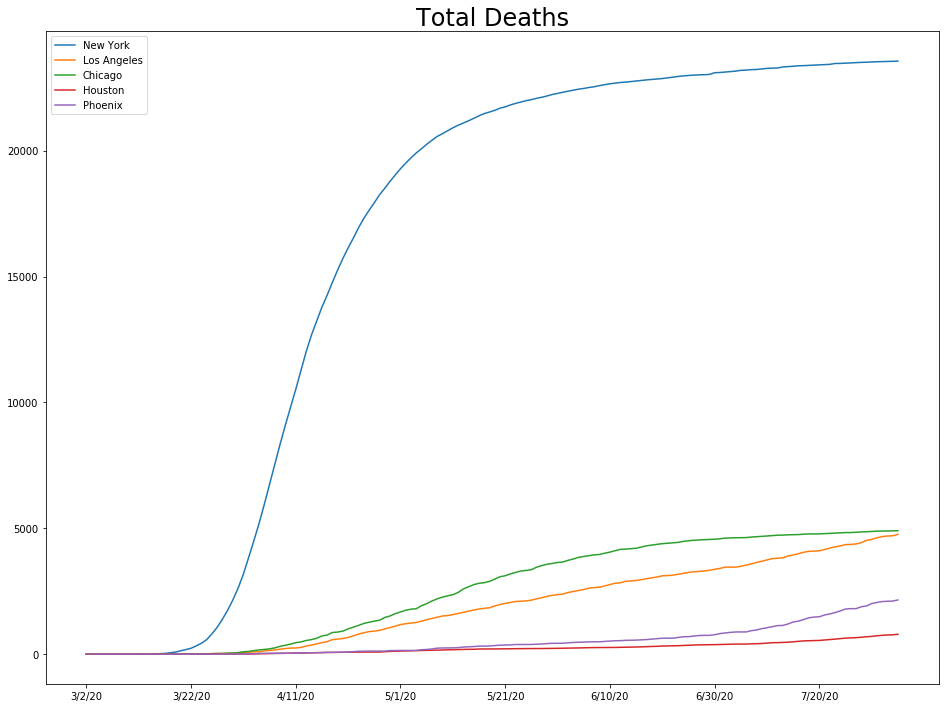

In [12]:
fig = plt.figure(figsize=(16,12))

for city in [NewYork, LosAngeles, Chicago, Houston, Phoenix]:
    plt.plot(city.iloc[40:,1])

plt.legend(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])
plt.xticks(NewYork.index[40::20])
plt.title('Total Deaths', fontsize = 24)
plt.show()

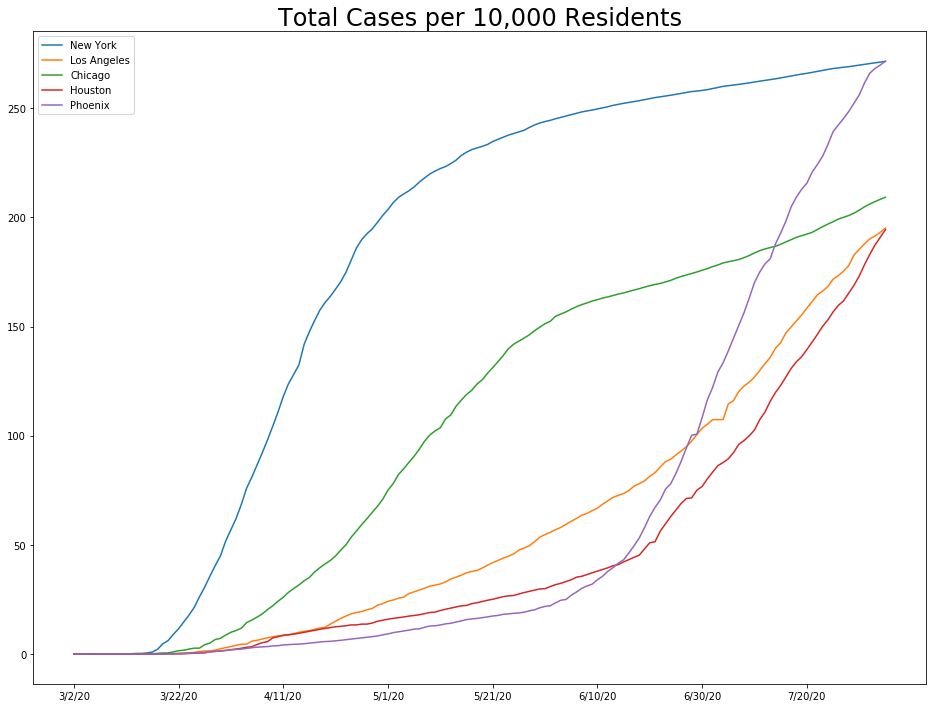

In [13]:
fig = plt.figure(figsize=(16,12))

for city in [NewYork, LosAngeles, Chicago, Houston, Phoenix]:
    plt.plot(city.iloc[40:,2])

plt.legend(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])
plt.xticks(NewYork.index[40::20])
plt.title('Total Cases per 10,000 Residents', fontsize = 24)
plt.show()

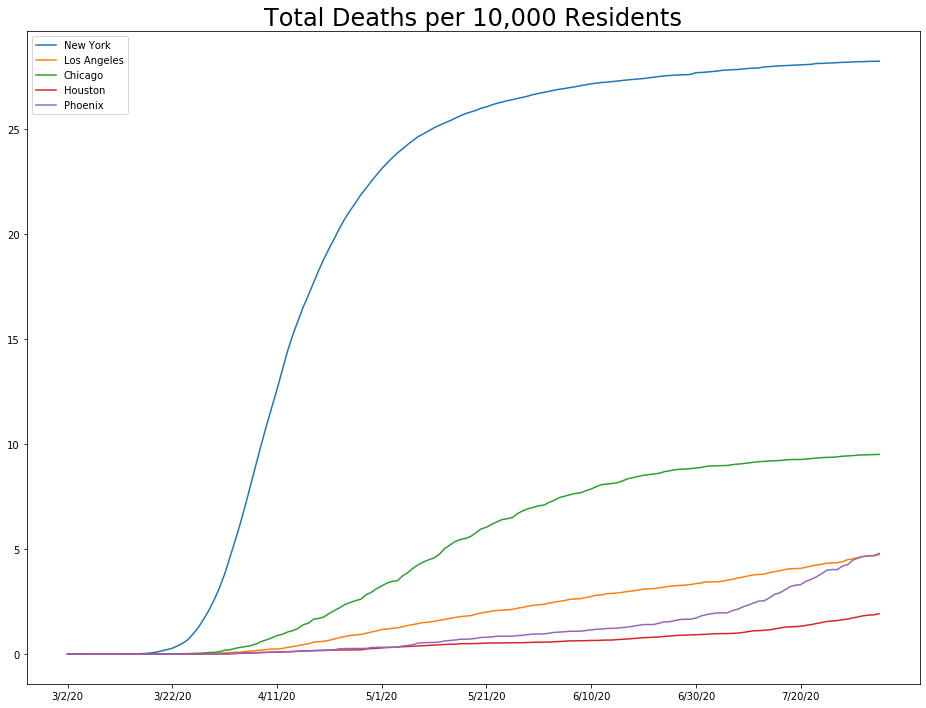

In [14]:
fig = plt.figure(figsize=(16,12))

for city in [NewYork, LosAngeles, Chicago, Houston, Phoenix]:
    plt.plot(city.iloc[40:,3])

plt.legend(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])
plt.xticks(NewYork.index[40::20])
plt.title('Total Deaths per 10,000 Residents', fontsize = 24)
plt.show()

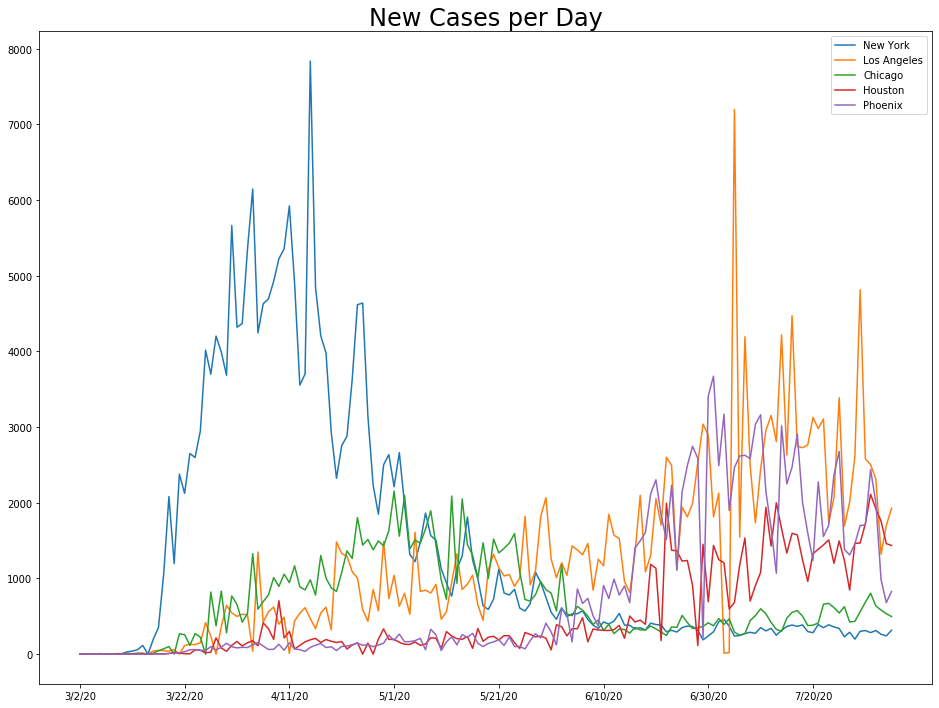

In [15]:
fig = plt.figure(figsize=(16,12))

for city in [NewYork, LosAngeles, Chicago, Houston, Phoenix]:
    plt.plot(city.iloc[40:,4])

plt.legend(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])
plt.xticks(NewYork.index[40::20])
plt.title('New Cases per Day', fontsize = 24)
plt.show()

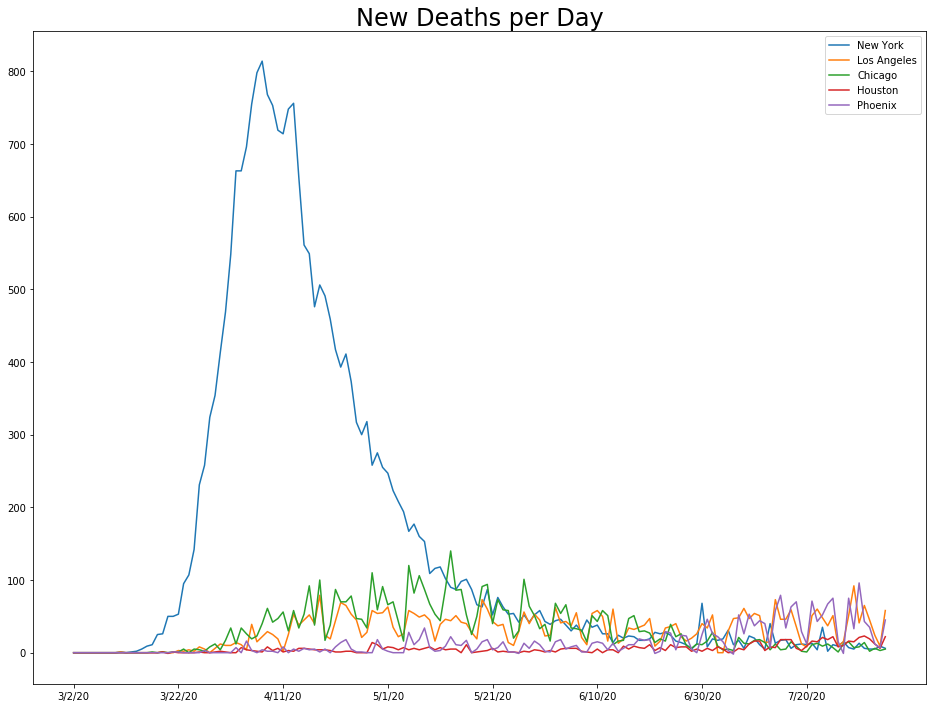

In [16]:
fig = plt.figure(figsize=(16,12))

for city in [NewYork, LosAngeles, Chicago, Houston, Phoenix]:
    plt.plot(city.iloc[40:,5])

plt.legend(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])
plt.xticks(NewYork.index[40::20])
plt.title('New Deaths per Day', fontsize = 24)
plt.show()

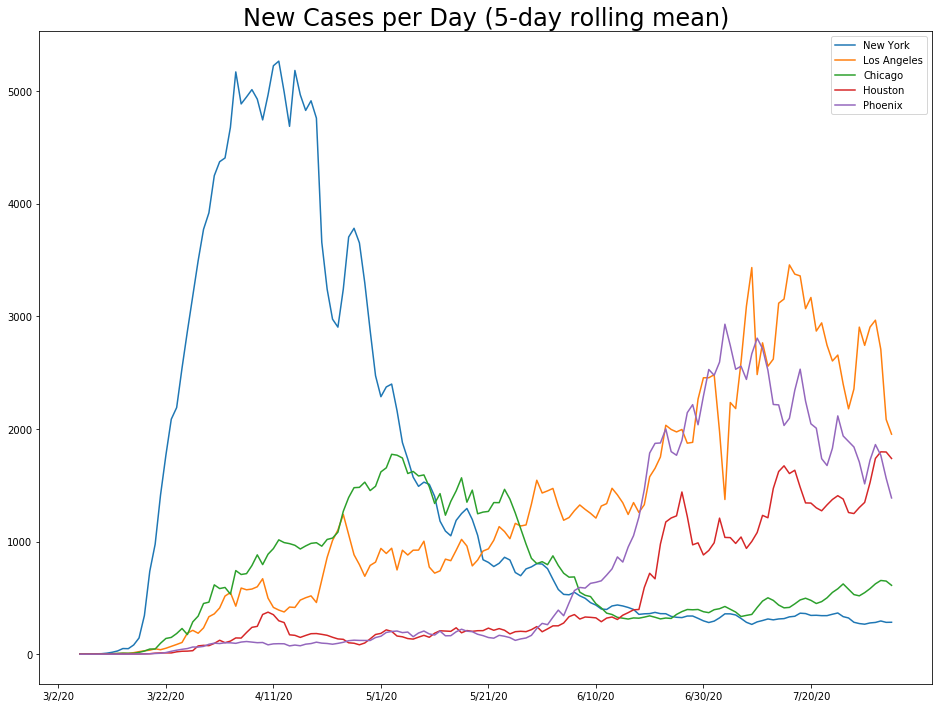

In [17]:
fig = plt.figure(figsize=(16,12))

for city in [NewYork, LosAngeles, Chicago, Houston, Phoenix]:
    plt.plot(city.iloc[40:,4].rolling(5).mean())

plt.legend(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])
plt.xticks(NewYork.index[40::20])
plt.title('New Cases per Day (5-day rolling mean)', fontsize = 24)
plt.show()

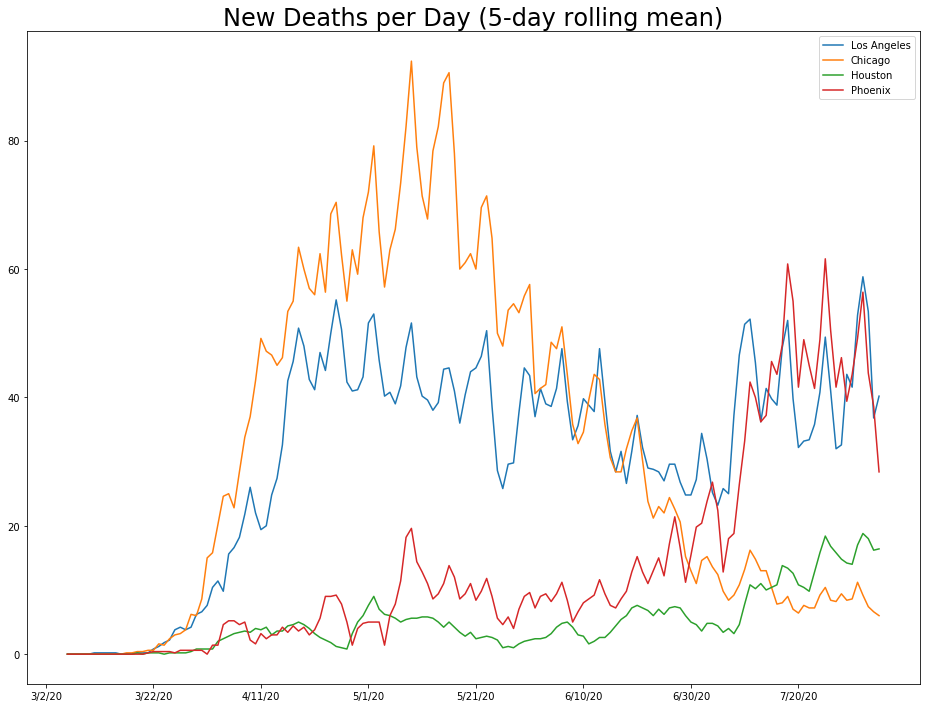

In [18]:
fig = plt.figure(figsize=(16,12))

for city in [LosAngeles, Chicago, Houston, Phoenix]:
    plt.plot(city.iloc[40:,5].rolling(5).mean())

plt.legend(['Los Angeles', 'Chicago', 'Houston', 'Phoenix'])
plt.xticks(NewYork.index[40::20])
plt.title('New Deaths per Day (5-day rolling mean)', fontsize = 24)
plt.show()